In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Cleaning

In [2]:
#importing 2020 dataset
df = pd.read_csv('https://www.dropbox.com/s/4s5kg4qse26y8s8/2020.csv?dl=1')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [3]:
#List of all common columns (2020 dataset names)
common_2020 = ['Country name', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
               'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

#Making a new DataFrame of said columns
cols_merge_2020 = df.loc[:, common_2020]

#Adding year
cols_merge_2020['Year'] = 2020
cols_merge_2020.head()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,2020
1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,2020
2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,2020
3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,2020
4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,2020


In [5]:
#importing 2019 dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/Py4EconWeek-LSE/Course-material/main/Happiness%20and%20GDP/happiness_with_continent(2019).csv')
df2.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Continent
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,Asia
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,Asia
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia


In [7]:
#List of all common columns (2019 dataset names)
common_2019 = ['Country name', 'Life Ladder', 'Year', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
               'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

#Making new DataFrame with said columns
cols_merge_2019 = df2.loc[:, common_2019]

#Renaming to match 2020 dataset names
cols_merge_2019.rename(columns = {'Life Ladder':'Ladder score', 'Log GDP per capita':'Logged GDP per capita', 
                                  'Healthy life expectancy at birth': 'Healthy life expectancy'}, inplace = True)
cols_merge_2019.head()

,Country name,Ladder score,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,3.723590,2008,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686
1,Afghanistan,4.401778,2009,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035
2,Afghanistan,4.758381,2010,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766
3,Afghanistan,3.831719,2011,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109
4,Afghanistan,3.782938,2012,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620


In [8]:
#Merging both datasets
merged = cols_merge_2019.append(cols_merge_2020)
merged.sort_values("Country name")
merged.head()

,Country name,Ladder score,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,3.723590,2008,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686
1,Afghanistan,4.401778,2009,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035
2,Afghanistan,4.758381,2010,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766
3,Afghanistan,3.831719,2011,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109
4,Afghanistan,3.782938,2012,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620


In [9]:
#Checking
#All observations for one country
print(merged[merged["Country name"] == 'Finland'])

#Length of dataframes
print("Sum of individual dataframe lengths: " + str((len(cols_merge_2020)+len(cols_merge_2019))))
print("Merged dataframe length: " + str(len(merged)))

    Country name  Ladder score  ...  Generosity  Perceptions of corruption
485      Finland      7.672449  ...   -0.009652                   0.132430
486      Finland      7.670627  ...    0.022528                   0.216568
487      Finland      7.393264  ...    0.086498                   0.412516
488      Finland      7.354225  ...    0.096756                   0.319593
489      Finland      7.420209  ...   -0.005709                   0.360734
490      Finland      7.444636  ...    0.034852                   0.305770
491      Finland      7.384571  ...   -0.005278                   0.265480
492      Finland      7.447926  ...    0.107067                   0.223370
493      Finland      7.659843  ...   -0.030627                   0.249660
494      Finland      7.788252  ...   -0.005696                   0.192413
495      Finland      7.858107  ...   -0.131735                   0.198605
0        Finland      7.808700  ...   -0.059482                   0.195445

[12 rows x 9 columns]
Su

In [11]:
#Adding column for mismatched continents/regions
#Strategy: 
#From each dataset, create a dictionary of {Country:Continent or Region} 
#Call them continent_id and region_id respectively
#In new merged dataset, create two new columns
#Fill in values based on dictionary?

#Trying on 2019 dataset
unique_countries = df2['Country name'].unique()
print(len(unique_countries))
continent_id = {}

for country in unique_countries:
  continent = df2[df2['Country name'] == country]['Continent'].iat[0]
  continent_id[country] = continent

#continent_id is a dictionary pairing country with continent  
print(continent_id)

#Do the same for 2020 dataset
unique_countries_2020 = df['Country name'].unique()
print(len(unique_countries_2020))
region_id = {}

for country in unique_countries_2020:
  region = df[df['Country name'] == country]['Regional indicator'].iloc[0]
  region_id[country] = region

#region_id is dictionary pairing country with region (not all countries recorded in 2020)
print(region_id)

#Add two columns to merged, called continent and region
merged['Continent'] = merged['Country name'].map(continent_id)
merged['Region'] = merged['Country name'].map(region_id)
merged.sort_values("Country name")
merged[merged["Country name"] == 'Finland'].head(13)
merged.head(5)

#omg i (think i) did it

165
{'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Angola': 'Africa', 'Argentina': 'South America', 'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia', 'Bangladesh': 'Asia', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Belize': 'North America', 'Benin': 'Africa', 'Bhutan': 'Asia', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa', 'Brazil': 'South America', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America', 'Central African Republic': 'Africa', 'Chad': 'Africa', 'Chile': 'South America', 'China': 'Asia', 'Colombia': 'South America', 'Comoros': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Congo (Kinshasa)': 'Africa', 'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America', 'Cyprus': 'Asia', 'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Djibouti': 'Africa', 'Dominican Republi

,Country name,Ladder score,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent,Region
0,Afghanistan,3.723590,2008,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,Asia,South Asia
1,Afghanistan,4.401778,2009,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,Asia,South Asia
2,Afghanistan,4.758381,2010,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,Asia,South Asia
3,Afghanistan,3.831719,2011,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,Asia,South Asia
4,Afghanistan,3.782938,2012,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,Asia,South Asia


In [12]:
merged.to_csv('merged.csv')

# Europe Analysis

In [13]:
#create a dataframe containing only Europe data
europe = merged[merged["Continent"] == "Europe"]

#drop NaN values (lose some rows)
europe_reg = europe.dropna()

#use only 2020 data
europe_reg = europe_reg[europe_reg["Year"] == 2020]
europe_reg.head()

,Country name,Ladder score,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent,Region
0,Finland,7.8087,2020,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,Europe,Western Europe
1,Denmark,7.6456,2020,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,Europe,Western Europe
2,Switzerland,7.5599,2020,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,Europe,Western Europe
3,Iceland,7.5045,2020,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,Europe,Western Europe
4,Norway,7.4880,2020,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,Europe,Western Europe


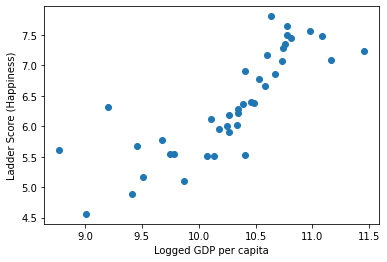

In [14]:
#Visualise this (apparently strong) relationship between LogGDP and ladder score
plt.scatter(europe_reg['Logged GDP per capita'], europe_reg['Ladder score'])
plt.xlabel("Logged GDP per capita")
plt.ylabel("Ladder Score (Happiness)")
plt.show()

In [15]:
#multivariate regression
X = europe_reg[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
Y = europe_reg['Ladder score']

X = sm.add_constant(X)
#simple OLS model
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     28.28
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           1.14e-11
Time:                        02:26:54   Log-Likelihood:                -13.405
No. Observations:                  40   AIC:                             40.81
Df Residuals:                      33   BIC:                             52.63
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

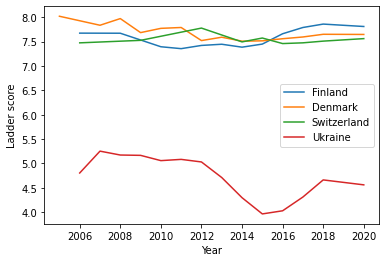

In [17]:
#Happiest and least happy countries
full_europe = merged[merged["Continent"] == "Europe"]
happiest = europe_reg.loc[europe_reg['Ladder score'].idxmax()].iat[0]
saddest = europe_reg.loc[europe_reg['Ladder score'].idxmin()].iat[0]

happiest_3 = europe_reg.nlargest(3, 'Ladder score')
happiest_3 = happiest_3["Country name"].to_list()

for country in happiest_3:
  plt.plot(full_europe[full_europe["Country name"] == country]["Year"], full_europe[full_europe["Country name"] == country]["Ladder score"], label = country)
plt.plot(full_europe[full_europe["Country name"] == saddest]["Year"], full_europe[full_europe["Country name"] == saddest]["Ladder score"], label = saddest)
plt.ylabel('Ladder score')
plt.xlabel('Year')
plt.legend()
plt.show()

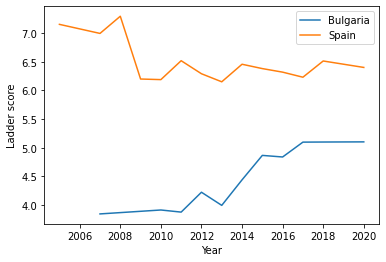

In [20]:
#Biggest decrease/increase
unique_european_countries = europe["Country name"].unique()
change = pd.DataFrame(unique_european_countries, columns=['Country name'])
earliest = []
latest = []

for i in unique_european_countries:
  relevant = europe[europe["Country name"] == i]
  earliest.append(relevant.loc[:, "Ladder score"].iloc[0])
  latest.append(relevant.loc[:, "Ladder score"].iloc[-1])

change["Earliest"] = earliest
change["Latest"] = latest
change["Change"] = change["Latest"] - change["Earliest"]

gainer = change.nlargest(1, "Change")["Country name"].iat[0]
loser = change.nsmallest(1, "Change")["Country name"].iat[0]

plt.plot(full_europe[full_europe["Country name"] == gainer]["Year"], full_europe[full_europe["Country name"] == gainer]["Ladder score"], label = gainer)
plt.plot(full_europe[full_europe["Country name"] == loser]["Year"], full_europe[full_europe["Country name"] == loser]["Ladder score"], label = loser)
plt.ylabel('Ladder score')
plt.xlabel('Year')
plt.legend()
plt.show()

# World Analysis


In [21]:
merged_reg = merged.dropna()

#add region dummies
merged_reg = pd.concat([merged_reg, pd.get_dummies(merged_reg['Continent'])], axis=1)

#want to take average of past 5 years for regression
world_reg = merged_reg[merged_reg["Year"] >= 2015]
world_reg = world_reg.groupby('Country name').mean()
world_reg.head()

,Ladder score,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
Country name,,,,,,,,,,,,,,
Afghanistan,3.225189,2017.200000,7.490556,0.511286,52.838000,0.421723,-0.030612,0.897914,0,1,0,0,0,0
Albania,4.728881,2017.200000,9.369394,0.654026,68.341628,0.757897,-0.034933,0.891486,0,0,1,0,0,0
Algeria,5.099033,2018.333333,9.545519,0.802930,65.835058,0.495554,-0.161680,0.731321,1,0,0,0,0,0
Argentina,6.186236,2017.200000,9.831610,0.903298,68.560760,0.847584,-0.188600,0.848030,0,0,0,0,0,1
Armenia,4.540155,2017.200000,9.064617,0.740325,66.510132,0.659074,-0.153697,0.827588,0,1,0,0,0,0


In [22]:
#Including regional dummies for multivariate regression
X = world_reg[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Africa', 'Asia',
               'Europe', 'North America', 'Oceania', 'South America']]
Y = world_reg['Ladder score']

#We do not add a constant to prevent multicollinearity
#simple OLS model
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     58.90
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           5.72e-47
Time:                        02:29:21   Log-Likelihood:                -98.138
No. Observations:                 152   AIC:                             220.3
Df Residuals:                     140   BIC:                             256.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Logged GDP per c